In [3]:
!wget https://datahack-prod.s3.amazonaws.com/train_file/train_LZdllcl.csv -O train.csv

!wget https://datahack-prod.s3.amazonaws.com/test_file/test_2umaH9m.csv -O test.csv

!wget https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_M0L0uXE.csv -O sample_submission.csv


Redirecting output to ‘wget-log’.

Redirecting output to ‘wget-log.1’.

Redirecting output to ‘wget-log.2’.


**Importing Data**

In [3]:
!ls

sample_data	       test.csv   wget-log    wget-log.2
sample_submission.csv  train.csv  wget-log.1


In [0]:
# Import the required packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [0]:
# Read the train and test data
train=pd.read_csv("train.csv")
train.drop('employee_id',inplace=True,axis = 1)
test=pd.read_csv("test.csv")

In [3]:
# Check the variables in train data
train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [4]:
# Print datatype of each variable
train.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [5]:
# Dimension of the train dataset
train.shape

(54808, 13)

In [7]:
# Print the head of train dataset
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
# Unique values in each variable of train dataset
train.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     5
length_of_service       35
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
is_promoted              2
dtype: int64

### Univariate Analysis

#### Target Variable

In [8]:
train['is_promoted'].value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

In [0]:
# Around 91% trainee have promoted
# Unbalanced dataset 

#### Categorical Independent Variables

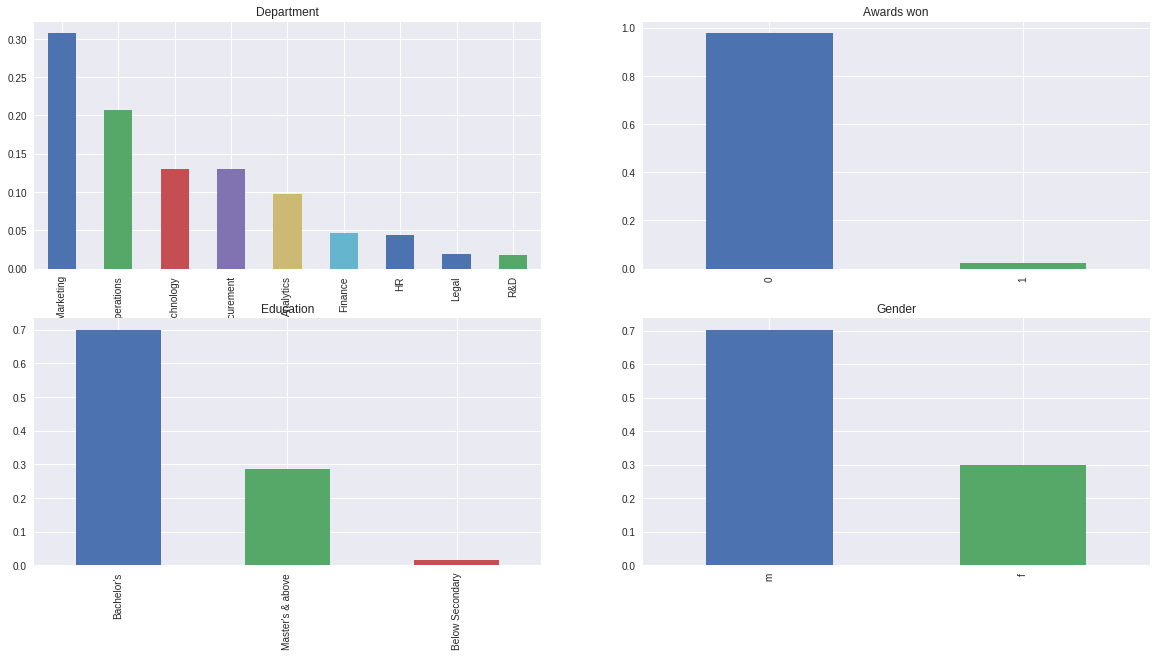

In [10]:
plt.figure(1)
plt.subplot(221)
train['department'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Department')

plt.subplot(222)
train['awards_won?'].value_counts(normalize=True).plot.bar(title= 'Awards won')

plt.subplot(223)
train['education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(224)
train['gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

plt.show()

In [0]:
# Most of the trainee are enrolled for Y and T program_type.
# More number of trainee enrolment for offline test than online test.
# Most of the test are easy in terms of difficulty level.

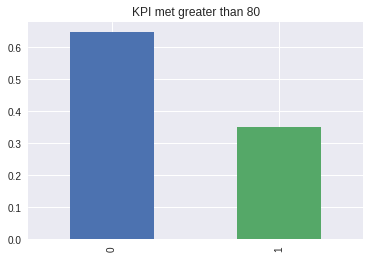

In [15]:
train['KPIs_met >80%'].value_counts(normalize=True).plot.bar(title= 'KPI met greater than 80')


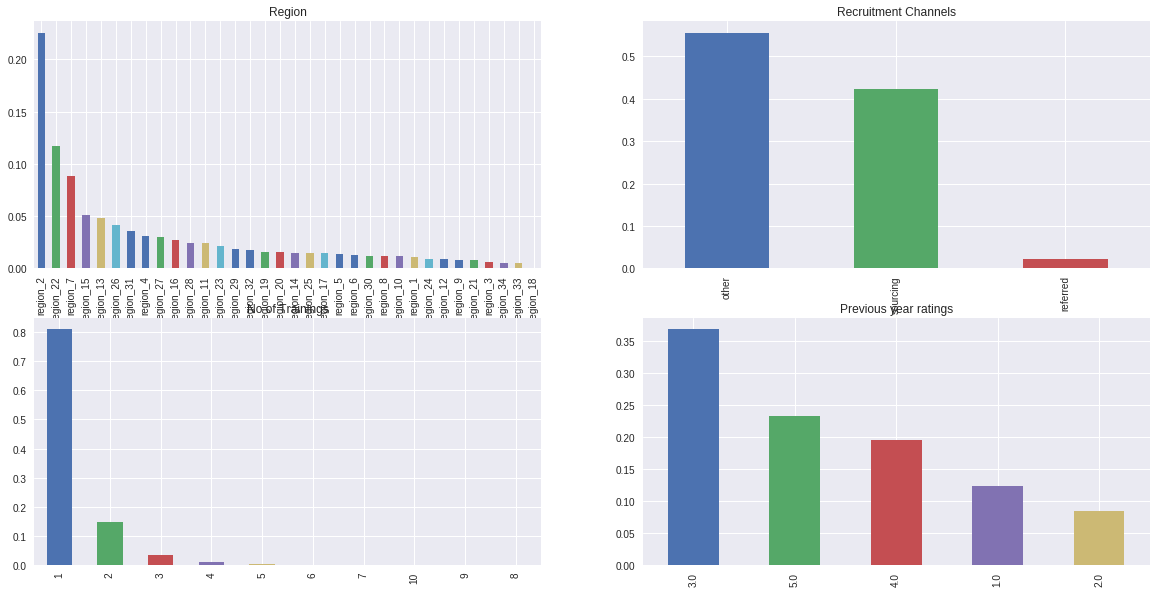

In [16]:
plt.figure(1)
plt.subplot(221)
train['region'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Region')

plt.subplot(222)
train['recruitment_channel'].value_counts(normalize=True).plot.bar(title='Recruitment Channels')

plt.subplot(223)
train['no_of_trainings'].value_counts(normalize=True).plot.bar(title= 'No of Trainings')

plt.subplot(224)
train['previous_year_rating'].value_counts(normalize=True).plot.bar(title= 'Previous year ratings')

plt.show()

In [0]:
# More male trainee as compared to female trainee
# Most of the trainee have diploma
# Most of the trainee belongs to tier 3 city
# 10% of the trainee are handicapped

#### Numerical Independent Variables

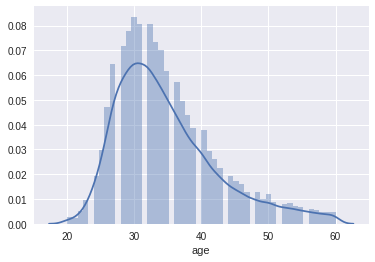

In [18]:
sns.distplot(train['age']);

In [0]:
# Most of the trainee are in the age range of 20-30 and 40-50

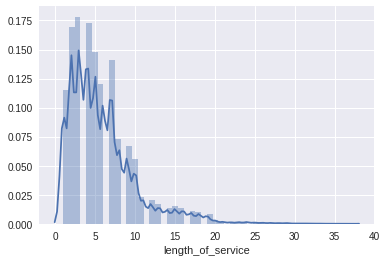

In [20]:
sns.distplot(train['length_of_service']);

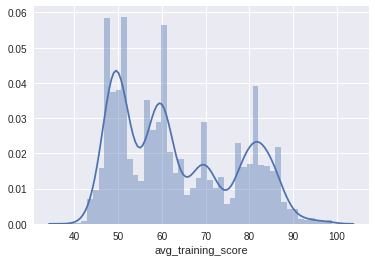

In [21]:
sns.distplot(train['avg_training_score']);

### Bivariate Analysis

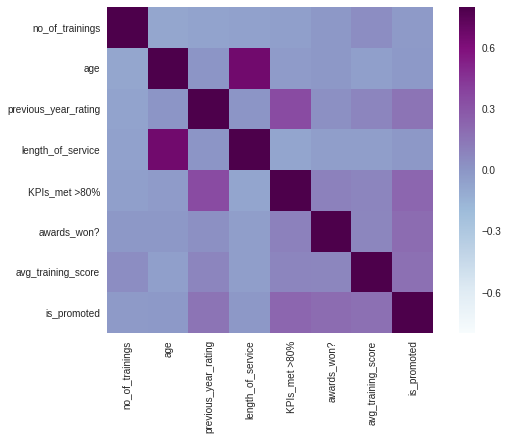

In [22]:
# Correlation between numerical variables
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [0]:
# Not much correlation between the variables

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


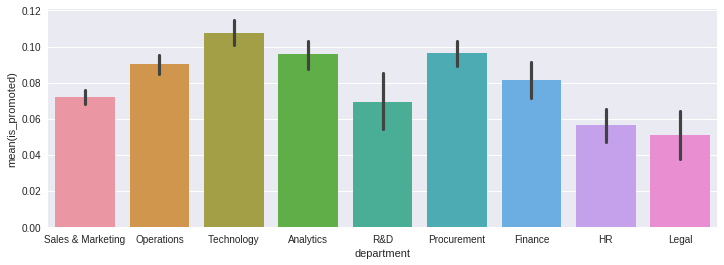

In [24]:
# program_id vs is_pass
plt.figure(figsize=(12,4))
sns.barplot(train['department'], train['is_promoted'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


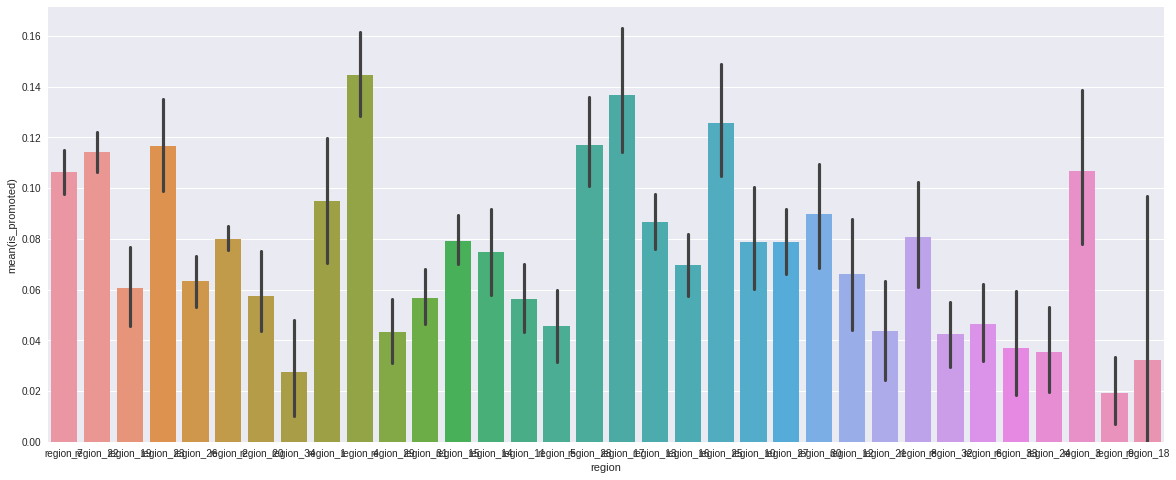

In [25]:
plt.figure(figsize=(20,8))
# program_type vs is_pass
sns.barplot(train['region'], train['is_promoted'])

In [0]:
# Trainee in X and Y program type have higher chances to pass the test

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


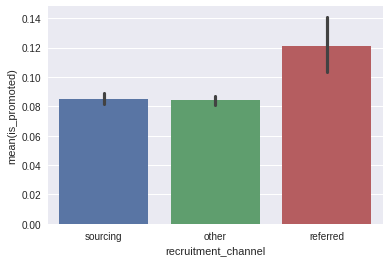

In [28]:
# test_type vs is_pass
sns.barplot(train['recruitment_channel'], train['is_promoted'])

In [0]:
# Trainee attending online mode of test have higher chances to pass the test

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


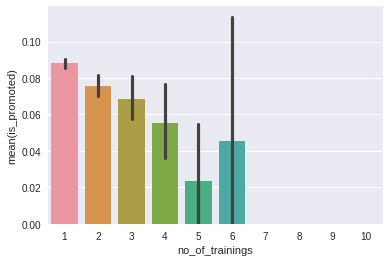

In [30]:
# difficulty_level vs is_pass
sns.barplot(train['no_of_trainings'], train['is_promoted'])

In [0]:
# If the difficulty level of the test is easy, chances to pass the test are higher

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


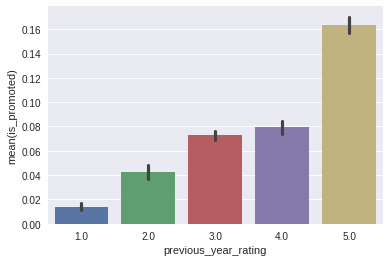

In [41]:
# Gender vs is_pass
sns.barplot(train['previous_year_rating'], train['is_promoted'])

In [0]:
# Gender does not affect the chances to pass the test

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


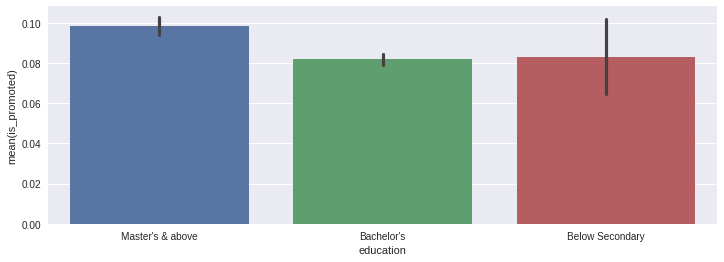

In [39]:
# education vs is_pass
plt.figure(figsize=(12,4))
sns.barplot(train['education'], train['is_promoted'])

In [0]:
# Trainee with Masters education level have more chances to pass the test

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


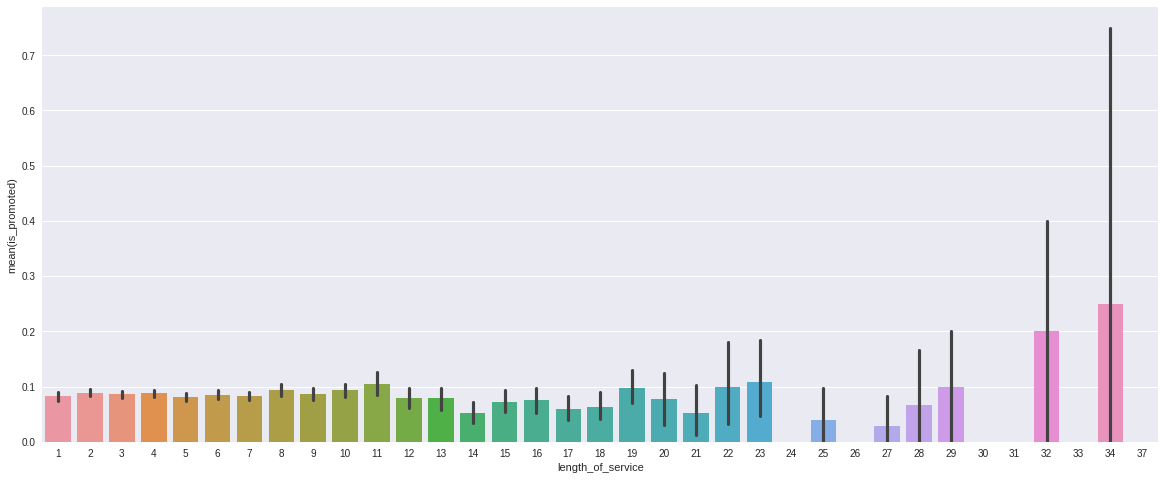

In [37]:
plt.figure(figsize=(20,8))
# is_handicapped vs is_pass
sns.barplot(train['length_of_service'], train['is_promoted'])

In [0]:
# Handicapped trainee have less chances to pass the test

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


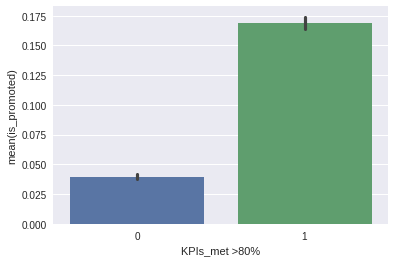

In [35]:
# city_tier vs is_pass
sns.barplot(train['KPIs_met >80%'], train['is_promoted'])

In [0]:
# Trainee from city tier 1 have higher chances to pass the test

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


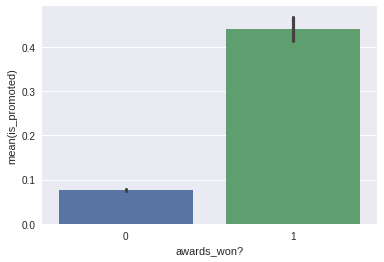

In [33]:
# trainee_engagement_rating vs is_pass
sns.barplot(train['awards_won?'], train['is_promoted'])

In [0]:
# As the trainee engagement rating increases, chances to pass the test also increases

### Missing Values Treatment

In [9]:
# Check the number of missing values in each variable
train.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [0]:
# age and trainee_engagement_rating variables have missing values in it.

In [11]:
test = pd.read_csv('test.csv')
test.drop('employee_id',inplace=True,axis = 1)
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [0]:
test['education'].fillna('other',inplace=True)
test['previous_year_rating'].fillna(99,inplace=True)

train['education'].fillna('other',inplace=True)
train['previous_year_rating'].fillna(99,inplace=True)

###Data preprocessing

In [13]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [0]:
# Save target variable in separate dataset
X = train.drop('is_promoted',axis=1)
y = train.is_promoted

In [15]:
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,99.0,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


### Catboost

In [0]:
categorical_features_indices = [0,1,2,3,4]

In [0]:
!pip install catboost

In [0]:
!pip install imblearn

In [0]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from pandas import Series
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import NearMiss,RandomUnderSampler,NearMiss,EditedNearestNeighbours,RepeatedEditedNearestNeighbours,AllKNN,CondensedNearestNeighbour,OneSidedSelection,NeighbourhoodCleaningRule,InstanceHardnessThreshold
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import RandomOverSampler,ADASYN
from collections import Counter
from imblearn.combine import SMOTETomek,SMOTEENN
from imblearn.ensemble import BalanceCascade
from sklearn.metrics import classification_report


In [18]:

# Catboost using 5 fold stratified cross validation
i=1

scores = []

kf = StratifiedKFold(n_splits=2,random_state=1,shuffle=True)

X = pd.get_dummies(X)

for train_index,test_index in kf.split(X,y):

     print('\n{} of kfold {}'.format(i,kf.n_splits))
    
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
        
     rs = InstanceHardnessThreshold(random_state=42)
     xtr_res, ytr_res = rs.fit_sample(xtr, ytr)
          
     print ("\nDistribution of class labels before resampling {}".format(Counter(ytr)))
     print ("\nDistribution of class labels after resampling {}".format(Counter(ytr_res)))
     
     model = GradientBoostingClassifier(n_estimators=1000,verbose=1)
     model.fit(xtr_res, ytr_res)
     pred=model.predict_proba(xvl)[:,1]
     score = f1_score(yvl,pred.round())
     print('f1_score',score)
     print (classification_report(yvl,pred.round()))
     scores.append(score)
      
     i+=1
    
print("Mean score:",np.mean(scores))
print("Standard deviation:",np.std(scores))


1 of kfold 2

Distribution of class labels before resampling Counter({0: 25070, 1: 2334})

Distribution of class labels after resampling Counter({0: 16649, 1: 2334})
      Iter       Train Loss   Remaining Time 
         1           0.6850           35.10s
         2           0.6492           34.45s
         3           0.6226           34.21s
         4           0.6020           33.99s
         5           0.5859           34.81s
         6           0.5707           34.75s
         7           0.5591           34.65s
         8           0.5465           34.62s
         9           0.5363           34.59s
        10           0.5270           34.53s
        20           0.4560           34.90s
        30           0.3983           35.97s
        40           0.3682           35.96s
        50           0.3525           34.89s
        60           0.3358           34.92s
        70           0.3271           34.27s
        80           0.3210           33.40s
        90           0

In [20]:

# Catboost using 5 fold stratified cross validation
i=1

scores = []

kf = StratifiedKFold(n_splits=2,random_state=1,shuffle=True)

X = pd.get_dummies(X)

for train_index,test_index in kf.split(X,y):

     print('\n{} of kfold {}'.format(i,kf.n_splits))
    
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
        
     rs = NeighbourhoodCleaningRule(random_state=42)
     xtr_res, ytr_res = rs.fit_sample(xtr, ytr)
          
     print ("\nDistribution of class labels before resampling {}".format(Counter(ytr)))
     print ("\nDistribution of class labels after resampling {}".format(Counter(ytr_res)))
     
     model = GradientBoostingClassifier(n_estimators=1000,verbose=1)
     model.fit(xtr_res, ytr_res)
     pred=model.predict_proba(xvl)[:,1]
     score = f1_score(yvl,pred.round())
     print('f1_score',score)
     print (classification_report(yvl,pred.round()))
     scores.append(score)
      
     i+=1
    
print("Mean score:",np.mean(scores))
print("Standard deviation:",np.std(scores))


1 of kfold 2

Distribution of class labels before resampling Counter({0: 25070, 1: 2334})

Distribution of class labels after resampling Counter({0: 20402, 1: 2334})
      Iter       Train Loss   Remaining Time 
         1           0.6244           39.17s
         2           0.6042           39.28s
         3           0.5883           39.89s
         4           0.5748           41.20s
         5           0.5646           41.38s
         6           0.5551           41.26s
         7           0.5480           41.15s
         8           0.5408           41.16s
         9           0.5352           41.53s
        10           0.5296           42.31s
        20           0.4580           42.49s
        30           0.4302           42.42s
        40           0.4036           43.28s
        50           0.3915           42.51s
        60           0.3843           41.67s
        70           0.3746           41.10s
        80           0.3696           40.26s
        90           0

In [21]:

# Catboost using 5 fold stratified cross validation
i=1

scores = []

kf = StratifiedKFold(n_splits=2,random_state=1,shuffle=True)

X = pd.get_dummies(X)

for train_index,test_index in kf.split(X,y):

     print('\n{} of kfold {}'.format(i,kf.n_splits))
    
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
        
     rs = OneSidedSelection(random_state=42)
     xtr_res, ytr_res = rs.fit_sample(xtr, ytr)
          
     print ("\nDistribution of class labels before resampling {}".format(Counter(ytr)))
     print ("\nDistribution of class labels after resampling {}".format(Counter(ytr_res)))
     
     model = GradientBoostingClassifier(n_estimators=1000,verbose=1)
     model.fit(xtr_res, ytr_res)
     pred=model.predict_proba(xvl)[:,1]
     score = f1_score(yvl,pred.round())
     print('f1_score',score)
     print (classification_report(yvl,pred.round()))
     scores.append(score)
      
     i+=1
    
print("Mean score:",np.mean(scores))
print("Standard deviation:",np.std(scores))


1 of kfold 2


/usr/local/lib/python3.6/dist-packages/imblearn/under_sampling/prototype_selection/one_sided_selection.py:197: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  idx_maj_extracted = np.delete(idx_maj, idx_maj_sample, axis=0)



Distribution of class labels before resampling Counter({0: 25070, 1: 2334})

Distribution of class labels after resampling Counter({0: 24473, 1: 2334})
      Iter       Train Loss   Remaining Time 
         1           0.5580           48.84s
         2           0.5423           49.27s
         3           0.5304           50.27s
         4           0.5213           49.85s
         5           0.5128           49.77s
         6           0.5059           49.50s
         7           0.4992           49.34s
         8           0.4944           49.78s
         9           0.4892           49.63s
        10           0.4848           49.44s
        20           0.4398           47.65s
        30           0.4024           50.34s
        40           0.3798           51.58s
        50           0.3677           51.04s
        60           0.3615           49.30s
        70           0.3555           47.92s
        80           0.3489           47.22s
        90           0.3461         

/usr/local/lib/python3.6/dist-packages/imblearn/under_sampling/prototype_selection/one_sided_selection.py:197: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  idx_maj_extracted = np.delete(idx_maj, idx_maj_sample, axis=0)



Distribution of class labels before resampling Counter({0: 25070, 1: 2334})

Distribution of class labels after resampling Counter({0: 24462, 1: 2334})
      Iter       Train Loss   Remaining Time 
         1           0.5617           48.25s
         2           0.5466           47.80s
         3           0.5344           49.03s
         4           0.5243           48.98s
         5           0.5166           49.18s
         6           0.5094           49.07s
         7           0.5027           49.01s
         8           0.4976           49.32s
         9           0.4924           49.12s
        10           0.4860           50.12s
        20           0.4458           47.93s
        30           0.4109           48.82s
        40           0.3927           48.06s
        50           0.3779           47.64s
        60           0.3724           46.91s
        70           0.3660           46.21s
        80           0.3588           45.70s
        90           0.3531         

In [128]:

# Catboost using 5 fold stratified cross validation
i=1

scores = []

kf = StratifiedKFold(n_splits=2,random_state=1,shuffle=True)

X = pd.get_dummies(X)

for train_index,test_index in kf.split(X,y):

     print('\n{} of kfold {}'.format(i,kf.n_splits))
    
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
        
     rs = AllKNN(random_state=42)
     xtr_res, ytr_res = rs.fit_sample(xtr, ytr)
          
     print ("\nDistribution of class labels before resampling {}".format(Counter(ytr)))
     print ("\nDistribution of class labels after resampling {}".format(Counter(ytr_res)))
     
     model = GradientBoostingClassifier(n_estimators=1000,verbose=1)
     model.fit(xtr_res, ytr_res)
     pred=model.predict_proba(xvl)[:,1]
     score = f1_score(yvl,pred.round())
     print('f1_score',score)
     print (classification_report(yvl,pred.round()))
     scores.append(score)
      
     i+=1
    
print("Mean score:",np.mean(scores))
print("Standard deviation:",np.std(scores))


1 of kfold 2

Distribution of class labels before resampling Counter({0: 25070, 1: 2334})

Distribution of class labels after resampling Counter({0: 21086, 1: 2334})
      Iter       Train Loss   Remaining Time 
         1           0.6103           39.55s
         2           0.5900           39.36s
         3           0.5751           39.28s
         4           0.5625           40.30s
         5           0.5512           40.37s
         6           0.5428           40.23s
         7           0.5345           40.17s
         8           0.5278           40.62s
         9           0.5226           41.00s
        10           0.5167           40.98s
        20           0.4645           40.52s
        30           0.4225           42.64s
        40           0.4016           42.43s
        50           0.3852           42.09s
        60           0.3738           41.84s
        70           0.3677           40.63s
        80           0.3608           40.01s
        90           0

In [127]:

# Catboost using 5 fold stratified cross validation
i=1

scores = []

kf = StratifiedKFold(n_splits=2,random_state=1,shuffle=True)

X = pd.get_dummies(X)

for train_index,test_index in kf.split(X,y):

     print('\n{} of kfold {}'.format(i,kf.n_splits))
    
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
        
     rs = RepeatedEditedNearestNeighbours(random_state=42)
     xtr_res, ytr_res = rs.fit_sample(xtr, ytr)
          
     print ("\nDistribution of class labels before resampling {}".format(Counter(ytr)))
     print ("\nDistribution of class labels after resampling {}".format(Counter(ytr_res)))
     
     model = GradientBoostingClassifier(n_estimators=1000,verbose=1)
     model.fit(xtr_res, ytr_res)
     pred=model.predict_proba(xvl)[:,1]
     score = f1_score(yvl,pred.round())
     print('f1_score',score)
     print (classification_report(yvl,pred.round()))
     scores.append(score)
      
     i+=1
    
print("Mean score:",np.mean(scores))
print("Standard deviation:",np.std(scores))


1 of kfold 2

Distribution of class labels before resampling Counter({0: 25070, 1: 2334})

Distribution of class labels after resampling Counter({0: 18949, 1: 2334})
      Iter       Train Loss   Remaining Time 
         1           0.6499           36.68s
         2           0.6247           36.80s
         3           0.6060           36.53s
         4           0.5906           36.56s
         5           0.5787           37.54s
         6           0.5679           37.23s
         7           0.5585           37.11s
         8           0.5515           36.78s
         9           0.5438           36.62s
        10           0.5348           36.37s
        20           0.4783           36.16s
        30           0.4316           38.06s
        40           0.4087           38.17s
        50           0.3917           38.47s
        60           0.3827           38.02s
        70           0.3713           37.47s
        80           0.3631           36.70s
        90           0

KeyboardInterrupt: ignored

In [125]:

# Catboost using 5 fold stratified cross validation
i=1

scores = []

kf = StratifiedKFold(n_splits=2,random_state=1,shuffle=True)

X = pd.get_dummies(X)

for train_index,test_index in kf.split(X,y):

     print('\n{} of kfold {}'.format(i,kf.n_splits))
    
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
        
     rs = EditedNearestNeighbours(random_state=42)
     xtr_res, ytr_res = rs.fit_sample(xtr, ytr)
          
     print ("\nDistribution of class labels before resampling {}".format(Counter(ytr)))
     print ("\nDistribution of class labels after resampling {}".format(Counter(ytr_res)))
     
     model = GradientBoostingClassifier(n_estimators=1000,verbose=1)
     model.fit(xtr_res, ytr_res)
     pred=model.predict_proba(xvl)[:,1]
     score = f1_score(yvl,pred.round())
     print('f1_score',score)
     print (classification_report(yvl,pred.round()))
     scores.append(score)
      
     i+=1
    
print("Mean score:",np.mean(scores))
print("Standard deviation:",np.std(scores))


1 of kfold 2

Distribution of class labels before resampling Counter({0: 25070, 1: 2334})

Distribution of class labels after resampling Counter({0: 21322, 1: 2334})
      Iter       Train Loss   Remaining Time 
         1           0.6066           40.20s
         2           0.5867           39.91s
         3           0.5721           39.88s
         4           0.5606           40.46s
         5           0.5495           40.44s
         6           0.5413           40.34s
         7           0.5331           40.34s
         8           0.5272           40.36s
         9           0.5209           40.61s
        10           0.5156           40.73s
        20           0.4474           43.68s
        30           0.4153           44.05s
        40           0.3983           43.70s
        50           0.3823           43.74s
        60           0.3715           43.05s
        70           0.3642           42.11s
        80           0.3582           41.31s
        90           0

In [124]:

# Catboost using 5 fold stratified cross validation
i=1

scores = []

kf = StratifiedKFold(n_splits=2,random_state=1,shuffle=True)

X = pd.get_dummies(X)

for train_index,test_index in kf.split(X,y):

     print('\n{} of kfold {}'.format(i,kf.n_splits))
    
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
        
     rs = RandomUnderSampler(random_state=42)
     xtr_res, ytr_res = rs.fit_sample(xtr, ytr)
          
     print ("\nDistribution of class labels before resampling {}".format(Counter(ytr)))
     print ("\nDistribution of class labels after resampling {}".format(Counter(ytr_res)))
     
     model = GradientBoostingClassifier(n_estimators=1000,verbose=1)
     model.fit(xtr_res, ytr_res)
     pred=model.predict_proba(xvl)[:,1]
     score = f1_score(yvl,pred.round())
     print('f1_score',score)
     print (classification_report(yvl,pred.round()))
     scores.append(score)
      
     i+=1
    
print("Mean score:",np.mean(scores))
print("Standard deviation:",np.std(scores))


1 of kfold 2

Distribution of class labels before resampling Counter({0: 25070, 1: 2334})

Distribution of class labels after resampling Counter({0: 2334, 1: 2334})
      Iter       Train Loss   Remaining Time 
         1           1.3307           11.47s
         2           1.2854           11.54s
         3           1.2473           11.47s
         4           1.2134           11.44s
         5           1.1850           11.39s
         6           1.1602           11.30s
         7           1.1383           11.30s
         8           1.1203           11.24s
         9           1.1024           11.27s
        10           1.0879           11.07s
        20           0.9833           10.40s
        30           0.9135            9.90s
        40           0.8691            9.60s
        50           0.8251            9.71s
        60           0.7956            9.51s
        70           0.7725            9.34s
        80           0.7532            9.24s
        90           0.

In [83]:
# Catboost using 5 fold stratified cross validation
i=1

scores = []

kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

X = pd.get_dummies(X)

for train_index,test_index in kf.split(X,y):

     print('\n{} of kfold {}'.format(i,kf.n_splits))
    
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
     
     model = LogisticRegression(class_weight='balanced')
     model.fit(xtr, ytr)
     pred=model.predict_proba(xvl)[:,1]
     score = f1_score(yvl,pred.round())
     print('f1_score',score)
     print (classification_report(yvl,pred.round()))
     scores.append(score)
      
     i+=1
    
print("Mean score:",np.mean(scores))
print("Standard deviation:",np.std(scores))


1 of kfold 5
f1_score 0.37158733993718285
             precision    recall  f1-score   support

          0       0.98      0.76      0.85     10028
          1       0.24      0.82      0.37       934

avg / total       0.92      0.76      0.81     10962


2 of kfold 5
f1_score 0.37680438028870084
             precision    recall  f1-score   support

          0       0.98      0.77      0.86     10028
          1       0.25      0.81      0.38       934

avg / total       0.92      0.77      0.82     10962


3 of kfold 5
f1_score 0.3745754488112567
             precision    recall  f1-score   support

          0       0.98      0.76      0.86     10028
          1       0.24      0.83      0.37       934

avg / total       0.92      0.76      0.81     10962


4 of kfold 5
f1_score 0.3703523693803159
             precision    recall  f1-score   support

          0       0.98      0.76      0.85     10028
          1       0.24      0.82      0.37       933

avg / total       0.92  

In [84]:
# Catboost using 5 fold stratified cross validation
i=1

scores = []

kf = StratifiedKFold(n_splits=3,random_state=1,shuffle=True)

X = pd.get_dummies(X)

for train_index,test_index in kf.split(X,y):

     print('\n{} of kfold {}'.format(i,kf.n_splits))
    
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
        
     rs = NearMiss(ratio=0.5,n_neighbors=3, version=2)  
     xtr_res, ytr_res = rs.fit_sample(xtr, ytr)
          
     print ("\nDistribution of class labels before resampling {}".format(Counter(ytr)))
     print ("\nDistribution of class labels after resampling {}".format(Counter(ytr_res)))
     
     model = LogisticRegression(class_weight='balanced')
     model.fit(xtr_res, ytr_res)
     pred=model.predict_proba(xvl)[:,1]
     score = f1_score(yvl,pred.round())
     print('f1_score',score)
     print (classification_report(yvl,pred.round()))
     scores.append(score)
      
     i+=1
    
print("Mean score:",np.mean(scores))
print("Standard deviation:",np.std(scores))


1 of kfold 5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)



Distribution of class labels before resampling Counter({0: 40112, 1: 3734})

Distribution of class labels after resampling Counter({0: 7468, 1: 3734})
f1_score 0.1959525471039777
             precision    recall  f1-score   support

          0       0.95      0.45      0.61     10028
          1       0.11      0.75      0.20       934

avg / total       0.88      0.47      0.57     10962


2 of kfold 5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)



Distribution of class labels before resampling Counter({0: 40112, 1: 3734})

Distribution of class labels after resampling Counter({0: 7468, 1: 3734})
f1_score 0.20011179429849077
             precision    recall  f1-score   support

          0       0.95      0.45      0.61     10028
          1       0.12      0.77      0.20       934

avg / total       0.88      0.48      0.58     10962


3 of kfold 5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)



Distribution of class labels before resampling Counter({0: 40112, 1: 3734})

Distribution of class labels after resampling Counter({0: 7468, 1: 3734})
f1_score 0.19368188715684923
             precision    recall  f1-score   support

          0       0.95      0.44      0.60     10028
          1       0.11      0.75      0.19       934

avg / total       0.88      0.47      0.57     10962


4 of kfold 5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)



Distribution of class labels before resampling Counter({0: 40112, 1: 3735})

Distribution of class labels after resampling Counter({0: 7470, 1: 3735})
f1_score 0.20695480782767844
             precision    recall  f1-score   support

          0       0.96      0.46      0.62     10028
          1       0.12      0.79      0.21       933

avg / total       0.89      0.49      0.58     10961


5 of kfold 5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)



Distribution of class labels before resampling Counter({0: 40112, 1: 3735})

Distribution of class labels after resampling Counter({0: 7470, 1: 3735})
f1_score 0.1989994441356309
             precision    recall  f1-score   support

          0       0.95      0.45      0.61     10028
          1       0.11      0.77      0.20       933

avg / total       0.88      0.47      0.57     10961

Mean score: 0.1991400961045254
Standard deviation: 0.004516330661496787


In [85]:

# Catboost using 5 fold stratified cross validation
i=1

scores = []

kf = StratifiedKFold(n_splits=3,random_state=1,shuffle=True)

X = pd.get_dummies(X)

for train_index,test_index in kf.split(X,y):

     print('\n{} of kfold {}'.format(i,kf.n_splits))
    
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
        
     rs = RandomOverSampler(ratio=0.5)  
     xtr_res, ytr_res = rs.fit_sample(xtr, ytr)
          
     print ("\nDistribution of class labels before resampling {}".format(Counter(ytr)))
     print ("\nDistribution of class labels after resampling {}".format(Counter(ytr_res)))
     
     model = LogisticRegression(class_weight='balanced')
     model.fit(xtr_res, ytr_res)
     pred=model.predict_proba(xvl)[:,1]
     score = f1_score(yvl,pred.round())
     print('f1_score',score)
     print (classification_report(yvl,pred.round()))
     scores.append(score)
      
     i+=1
    
print("Mean score:",np.mean(scores))
print("Standard deviation:",np.std(scores))


1 of kfold 3

Distribution of class labels before resampling Counter({0: 33426, 1: 3112})

Distribution of class labels after resampling Counter({0: 33426, 1: 16713})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


f1_score 0.3716892289582107
             precision    recall  f1-score   support

          0       0.98      0.76      0.86     16714
          1       0.24      0.81      0.37      1556

avg / total       0.91      0.77      0.82     18270


2 of kfold 3

Distribution of class labels before resampling Counter({0: 33427, 1: 3112})

Distribution of class labels after resampling Counter({0: 33427, 1: 16713})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


f1_score 0.374180387585604
             precision    recall  f1-score   support

          0       0.98      0.76      0.86     16713
          1       0.24      0.83      0.37      1556

avg / total       0.92      0.76      0.81     18269


3 of kfold 3

Distribution of class labels before resampling Counter({0: 33427, 1: 3112})

Distribution of class labels after resampling Counter({0: 33427, 1: 16713})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


f1_score 0.37221065159178823
             precision    recall  f1-score   support

          0       0.98      0.77      0.86     16713
          1       0.24      0.80      0.37      1556

avg / total       0.91      0.77      0.82     18269

Mean score: 0.3726934227118677
Standard deviation: 0.0010727748420167418


In [86]:

# Catboost using 5 fold stratified cross validation
i=1

scores = []

kf = StratifiedKFold(n_splits=3,random_state=1,shuffle=True)

X = pd.get_dummies(X)

for train_index,test_index in kf.split(X,y):

     print('\n{} of kfold {}'.format(i,kf.n_splits))
    
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
        
     rs = SMOTETomek(ratio=0.5, k=5)
     xtr_res, ytr_res = rs.fit_sample(xtr, ytr)
          
     print ("\nDistribution of class labels before resampling {}".format(Counter(ytr)))
     print ("\nDistribution of class labels after resampling {}".format(Counter(ytr_res)))
     
     model = LogisticRegression(class_weight='balanced')
     model.fit(xtr_res, ytr_res)
     pred=model.predict_proba(xvl)[:,1]
     score = f1_score(yvl,pred.round())
     print('f1_score',score)
     print (classification_report(yvl,pred.round()))
     scores.append(score)
      
     i+=1
    
print("Mean score:",np.mean(scores))
print("Standard deviation:",np.std(scores))


1 of kfold 3


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'm' is deprecated from 0.2 and will be removed in 0.4. Use 'm_neighbors' instead.
  category=DeprecationWarning)



Distribution of class labels before resampling Counter({0: 33426, 1: 3112})

Distribution of class labels after resampling Counter({0: 33398, 1: 16685})
f1_score 0.37288642825078555
             precision    recall  f1-score   support

          0       0.98      0.77      0.86     16714
          1       0.24      0.80      0.37      1556

avg / total       0.91      0.77      0.82     18270


2 of kfold 3


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'm' is deprecated from 0.2 and will be removed in 0.4. Use 'm_neighbors' instead.
  category=DeprecationWarning)



Distribution of class labels before resampling Counter({0: 33427, 1: 3112})

Distribution of class labels after resampling Counter({0: 33397, 1: 16683})
f1_score 0.3742742295667708
             precision    recall  f1-score   support

          0       0.98      0.77      0.86     16713
          1       0.24      0.81      0.37      1556

avg / total       0.91      0.77      0.82     18269


3 of kfold 3


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'm' is deprecated from 0.2 and will be removed in 0.4. Use 'm_neighbors' instead.
  category=DeprecationWarning)



Distribution of class labels before resampling Counter({0: 33427, 1: 3112})

Distribution of class labels after resampling Counter({0: 33397, 1: 16683})
f1_score 0.3761048460835112
             precision    recall  f1-score   support

          0       0.98      0.77      0.86     16713
          1       0.25      0.79      0.38      1556

avg / total       0.91      0.78      0.82     18269

Mean score: 0.37442183463368917
Standard deviation: 0.00131805254784893


In [95]:

# Catboost using 5 fold stratified cross validation
i=1

scores = []

kf = StratifiedKFold(n_splits=3,random_state=1,shuffle=True)

X = pd.get_dummies(X)

for train_index,test_index in kf.split(X,y):

     print('\n{} of kfold {}'.format(i,kf.n_splits))
    
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
        
     rs = SMOTE(random_state=42)
     xtr_res, ytr_res = rs.fit_sample(xtr, ytr)
          
     print ("\nDistribution of class labels before resampling {}".format(Counter(ytr)))
     print ("\nDistribution of class labels after resampling {}".format(Counter(ytr_res)))
     
     model = LogisticRegression(class_weight='balanced')
     model.fit(xtr_res, ytr_res)
     pred=model.predict_proba(xvl)[:,1]
     score = f1_score(yvl,pred.round())
     print('f1_score',score)
     print (classification_report(yvl,pred.round()))
     scores.append(score)
      
     i+=1
    
print("Mean score:",np.mean(scores))
print("Standard deviation:",np.std(scores))


1 of kfold 3

Distribution of class labels before resampling Counter({0: 33426, 1: 3112})

Distribution of class labels after resampling Counter({0: 33426, 1: 33426})
f1_score 0.37353383458646616
             precision    recall  f1-score   support

          0       0.98      0.77      0.86     16714
          1       0.24      0.80      0.37      1556

avg / total       0.91      0.77      0.82     18270


2 of kfold 3

Distribution of class labels before resampling Counter({0: 33427, 1: 3112})

Distribution of class labels after resampling Counter({0: 33427, 1: 33427})
f1_score 0.3762081784386617
             precision    recall  f1-score   support

          0       0.98      0.77      0.86     16713
          1       0.24      0.81      0.38      1556

avg / total       0.92      0.77      0.82     18269


3 of kfold 3

Distribution of class labels before resampling Counter({0: 33427, 1: 3112})

Distribution of class labels after resampling Counter({0: 33427, 1: 33427})
f1_score 

In [97]:

# Catboost using 5 fold stratified cross validation
i=1

scores = []

kf = StratifiedKFold(n_splits=3,random_state=1,shuffle=True)

X = pd.get_dummies(X)

for train_index,test_index in kf.split(X,y):

     print('\n{} of kfold {}'.format(i,kf.n_splits))
    
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
        
     rs = ADASYN()
     xtr_res, ytr_res = rs.fit_sample(xtr, ytr)
          
     print ("\nDistribution of class labels before resampling {}".format(Counter(ytr)))
     print ("\nDistribution of class labels after resampling {}".format(Counter(ytr_res)))
     
     model = LogisticRegression(class_weight='balanced')
     model.fit(xtr_res, ytr_res)
     pred=model.predict_proba(xvl)[:,1]
     score = f1_score(yvl,pred.round())
     print('f1_score',score)
     print (classification_report(yvl,pred.round()))
     scores.append(score)
      
     i+=1
    
print("Mean score:",np.mean(scores))
print("Standard deviation:",np.std(scores))


1 of kfold 3

Distribution of class labels before resampling Counter({0: 33426, 1: 3112})

Distribution of class labels after resampling Counter({0: 33426, 1: 32705})
f1_score 0.36871669307215904
             precision    recall  f1-score   support

          0       0.98      0.75      0.85     16714
          1       0.24      0.82      0.37      1556

avg / total       0.92      0.76      0.81     18270


2 of kfold 3

Distribution of class labels before resampling Counter({0: 33427, 1: 3112})

Distribution of class labels after resampling Counter({0: 33427, 1: 32567})
f1_score 0.369864960909737
             precision    recall  f1-score   support

          0       0.98      0.75      0.85     16713
          1       0.24      0.84      0.37      1556

avg / total       0.92      0.76      0.81     18269


3 of kfold 3

Distribution of class labels before resampling Counter({0: 33427, 1: 3112})

Distribution of class labels after resampling Counter({1: 34318, 0: 33427})
f1_score 0

In [99]:

# Catboost using 5 fold stratified cross validation
i=1

scores = []

kf = StratifiedKFold(n_splits=1,random_state=1,shuffle=True)

X = pd.get_dummies(X)

for train_index,test_index in kf.split(X,y):

     print('\n{} of kfold {}'.format(i,kf.n_splits))
    
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
        
     rs = SMOTE(kind='borderline1')
     xtr_res, ytr_res = rs.fit_sample(xtr, ytr)
          
     print ("\nDistribution of class labels before resampling {}".format(Counter(ytr)))
     print ("\nDistribution of class labels after resampling {}".format(Counter(ytr_res)))
     
     model = GradientBoostingClassifier(n_estimators=1000,verbose=1)
     model.fit(xtr_res, ytr_res)
     pred=model.predict_proba(xvl)[:,1]
     score = f1_score(yvl,pred.round())
     print('f1_score',score)
     print (classification_report(yvl,pred.round()))
     scores.append(score)
      
     i+=1
    
print("Mean score:",np.mean(scores))
print("Standard deviation:",np.std(scores))


1 of kfold 3

Distribution of class labels before resampling Counter({0: 33426, 1: 3112})

Distribution of class labels after resampling Counter({0: 33426, 1: 33426})
      Iter       Train Loss   Remaining Time 
         1           1.3100            2.94m
         2           1.2478            2.80m
         3           1.1961            2.77m
         4           1.1529            2.74m
         5           1.1095            2.76m
         6           1.0741            2.76m
         7           1.0459            2.76m
         8           1.0184            2.78m
         9           0.9899            2.80m
        10           0.9706            2.81m
        20           0.7958            2.80m
        30           0.6742            2.78m
        40           0.5840            2.72m
        50           0.5243            2.68m
        60           0.4871            2.58m
        70           0.4556            2.53m
        80           0.4311            2.45m
        90           

In [101]:

# Catboost using 5 fold stratified cross validation
i=1

scores = []

kf = StratifiedKFold(n_splits=2,random_state=1,shuffle=True)

X = pd.get_dummies(X)

for train_index,test_index in kf.split(X,y):

     print('\n{} of kfold {}'.format(i,kf.n_splits))
    
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
        
     rs = SMOTE(kind='borderline2')
     xtr_res, ytr_res = rs.fit_sample(xtr, ytr)
          
     print ("\nDistribution of class labels before resampling {}".format(Counter(ytr)))
     print ("\nDistribution of class labels after resampling {}".format(Counter(ytr_res)))
     
     model = GradientBoostingClassifier(n_estimators=1000,verbose=1)
     model.fit(xtr_res, ytr_res)
     pred=model.predict_proba(xvl)[:,1]
     score = f1_score(yvl,pred.round())
     print('f1_score',score)
     print (classification_report(yvl,pred.round()))
     scores.append(score)
      
     i+=1
    
print("Mean score:",np.mean(scores))
print("Standard deviation:",np.std(scores))


1 of kfold 2

Distribution of class labels before resampling Counter({0: 25070, 1: 2334})

Distribution of class labels after resampling Counter({0: 25070, 1: 25069})
      Iter       Train Loss   Remaining Time 
         1           1.3011            2.23m
         2           1.2311            2.16m
         3           1.1729            2.21m
         4           1.1253            2.16m
         5           1.0817            2.16m
         6           1.0461            2.14m
         7           1.0116            2.14m
         8           0.9839            2.11m
         9           0.9552            2.12m
        10           0.9258            2.14m
        20           0.7198            2.14m
        30           0.5849            2.11m
        40           0.5040            2.08m
        50           0.4459            2.05m
        60           0.4051            2.01m
        70           0.3792            1.94m
        80           0.3519            1.92m
        90           

In [103]:

# Catboost using 5 fold stratified cross validation
i=1

scores = []

kf = StratifiedKFold(n_splits=2,random_state=1,shuffle=True)

X = pd.get_dummies(X)

for train_index,test_index in kf.split(X,y):

     print('\n{} of kfold {}'.format(i,kf.n_splits))
    
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
        
     rs = SMOTE(kind='svm')
     xtr_res, ytr_res = rs.fit_sample(xtr, ytr)
          
     print ("\nDistribution of class labels before resampling {}".format(Counter(ytr)))
     print ("\nDistribution of class labels after resampling {}".format(Counter(ytr_res)))
     
     model = GradientBoostingClassifier(n_estimators=1000,verbose=1)
     model.fit(xtr_res, ytr_res)
     pred=model.predict_proba(xvl)[:,1]
     score = f1_score(yvl,pred.round())
     print('f1_score',score)
     print (classification_report(yvl,pred.round()))
     scores.append(score)
      
     i+=1
    
print("Mean score:",np.mean(scores))
print("Standard deviation:",np.std(scores))


1 of kfold 2

Distribution of class labels before resampling Counter({0: 25070, 1: 2334})

Distribution of class labels after resampling Counter({0: 25070, 1: 25069})
      Iter       Train Loss   Remaining Time 
         1           1.2756            1.88m
         2           1.1851            1.85m
         3           1.1097            1.87m
         4           1.0462            1.85m
         5           0.9920            1.86m
         6           0.9454            1.85m
         7           0.9049            1.85m
         8           0.8702            1.85m
         9           0.8377            1.88m
        10           0.8061            1.89m
        20           0.6243            1.93m
        30           0.5364            1.91m
        40           0.4736            1.89m
        50           0.4256            1.86m
        60           0.3866            1.84m
        70           0.3619            1.81m
        80           0.3400            1.78m
        90           

In [106]:

# Catboost using 5 fold stratified cross validation
i=1

scores = []

kf = StratifiedKFold(n_splits=2,random_state=1,shuffle=True)

X = pd.get_dummies(X)

for train_index,test_index in kf.split(X,y):

     print('\n{} of kfold {}'.format(i,kf.n_splits))
    
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
        
     rs = SMOTEENN(random_state=0)
     xtr_res, ytr_res = rs.fit_sample(xtr, ytr)
          
     print ("\nDistribution of class labels before resampling {}".format(Counter(ytr)))
     print ("\nDistribution of class labels after resampling {}".format(Counter(ytr_res)))
     
     model = GradientBoostingClassifier(n_estimators=1000,verbose=1)
     model.fit(xtr_res, ytr_res)
     pred=model.predict_proba(xvl)[:,1]
     score = f1_score(yvl,pred.round())
     print('f1_score',score)
     print (classification_report(yvl,pred.round()))
     scores.append(score)
      
     i+=1
    
print("Mean score:",np.mean(scores))
print("Standard deviation:",np.std(scores))


1 of kfold 2

Distribution of class labels before resampling Counter({0: 25070, 1: 2334})

Distribution of class labels after resampling Counter({1: 24942, 0: 16377})
      Iter       Train Loss   Remaining Time 
         1           1.2451            1.79m
         2           1.1662            1.75m
         3           1.1005            1.74m
         4           1.0456            1.72m
         5           0.9991            1.73m
         6           0.9549            1.76m
         7           0.9213            1.75m
         8           0.8888            1.76m
         9           0.8634            1.74m
        10           0.8372            1.75m
        20           0.6699            1.70m
        30           0.5637            1.69m
        40           0.4810            1.66m
        50           0.4324            1.63m
        60           0.3953            1.59m
        70           0.3681            1.56m
        80           0.3501            1.50m
        90           

In [123]:
from imblearn.ensemble import BalanceCascade
from sklearn.linear_model import LogisticRegression
bc = BalanceCascade(random_state=0,
                    estimator=LogisticRegression(random_state=0),
                    n_max_subset=4)
X_resampled, y_resampled = bc.fit_sample(X, y)
print(X_sampled.shape)
print(y_resampled)
model = LogisticRegression(class_weight='balanced')
model.fit(X_resampled, y_resampled)
pred=model.predict_proba(xvl)[:,1]


NameError: ignored

In [0]:
pred = model.predict(test)

In [70]:
pred

array([0., 0., 0., ..., 0., 0., 1.])

### **Submission**

In [0]:
# Read the submission file
submission=pd.read_csv("sample_submission.csv")

In [48]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [0]:
pred=model.predict_proba(test)[:,1]


In [86]:
pred

array([1.72722155e-01, 1.55211733e-03, 5.11486146e-04, ...,
       6.56580915e-04, 6.32388104e-03, 9.49742937e-01])

In [0]:
# Fill the is_pass variable with the predictions
submission['is_promoted']=pred

In [0]:
submission['is_promoted'] = submission['is_promoted'].astype(np.int64)

In [73]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [74]:
submission['is_promoted'].value_counts()

0    22845
1      645
Name: is_promoted, dtype: int64

In [0]:
# Converting the submission file to csv format
submission.to_csv('cat_submission-basic3-es.csv', index=False)

In [0]:
from google.colab import files
files.download('cat_submission-basic3-es.csv')

score on leaderboard - 0.71145